In [1]:
import numpy as np
import os
from matplotlib import pylab
import plotly
from tqdm import tqdm
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import networkx as nx
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)


In [2]:
os.getcwd()
os.chdir('C:\\Users\\rduvo\\Desktop\\ComplexNetwork\\Idea_of_Project\\circuitdata\\mouseretina')
os.getcwd()

'C:\\Users\\rduvo\\Desktop\\ComplexNetwork\\Idea_of_Project\\circuitdata\\mouseretina'

## Cells Position


In [3]:
infile="mouseretina.db"
outfile="Contacts.png"

LIGHT_AXIS = [0.9916,0.0572, 0.1164]
MAX_DIM = [132.0, 114.0, 80.0]
BASEDIR = "../../data/mouseretina" 
PAPER_MAX_CONTACT_AREA = 5.0
con = sqlite3.connect(infile)

cells2=pd.read_sql("select type_id,designation, certainty, coarse from types", 
                                     con, index_col='type_id')
con.close() 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1600x1200 with 0 Axes>

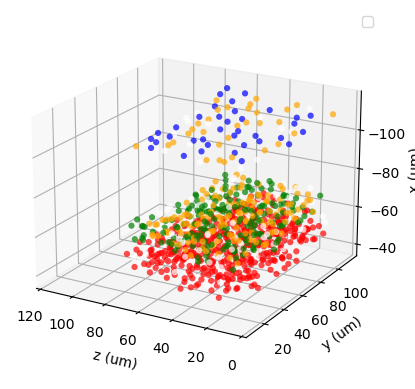

In [4]:
infile="mouseretina.db"
outfile="Contacts.png"

LIGHT_AXIS = [0.9916,0.0572, 0.1164]
MAX_DIM = [132.0, 114.0, 80.0]
BASEDIR = "../../data/mouseretina" 
PAPER_MAX_CONTACT_AREA = 5.0

con = sqlite3.connect(infile)
cells = pd.read_sql("select c.cell_id, s.x, s.z, s.y, t.coarse from cells as c join somapositions as s on c.cell_id = s.cell_id join types as t on c.type_id = t.type_id", 
                                     con, index_col='cell_id')

color_map = {'gc' : 'blue', 'nac' : 'green','mwac' : 'orange', 'bc' : 'red', 'other' : 'w', None : 'w'}
colors = [color_map[c] for c in cells['coarse']]
cells.insert(4,'colors',colors,True)


f = pylab.figure(figsize=(16, 12))
S = 20
alpha = 0.7


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(cells['z'], cells['y'], -cells['x'], c = colors,
               edgecolor='none', s=S, alpha=alpha)
ax.set_xlim(0, 120)
ax.legend()
    
ax.set_xlabel('z (um)')
ax.set_ylabel('y (um)')
ax.set_zlabel('x (um)')
ax.view_init(-160, 60)


In [5]:
df = cells.copy()
fig = px.scatter_3d(df, x='x', y='y', z='z',
              color='colors',title='Cells Positions',text='coarse')

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
plotly.offline.plot(fig, filename='C:\\Users\\rduvo\\Desktop\\ComplexNetwork\\Idea_of_Project\\circuitdata\\mouseretina\\Plots\\Plot_only_Position.html')

'C:\\Users\\rduvo\\Desktop\\ComplexNetwork\\Idea_of_Project\\circuitdata\\mouseretina\\Plots\\Plot_only_Position.html'

## Load Data 

In [6]:
cur = con.cursor()
cur.execute("SELECT * FROM contacts")
rows = cur.fetchall()

In [7]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()

# Print the list of tables
print("Tables in the database:")
for table in tables:
    print(table[0])
    
cur.execute("PRAGMA table_info(cells);")
columns = cur.fetchall()

# Print the columns for the specified table
print("\nColumns in the table:")
for column in columns:
    print(column[1])

Tables in the database:
types
cells
somapositions
contacts

Columns in the table:
cell_id
type_id


In [8]:
Edges = pd.read_sql("select id,from_id,to_id,x, z, y from contacts", 
                                     con, index_col='id')
con.close() 

In [9]:
Cell_o_I=22
edg_sub=Edges[Edges.from_id  == Cell_o_I]
Array_to_id=np.sort(np.array(edg_sub.to_id))
Array_connection_repeti=list(zip(*np.unique(Array_to_id, return_counts = True, axis = 0)))

row_cell_o_i=cells.loc[Cell_o_I].to_dict()
Edge_sub_plt=pd.DataFrame(columns=['x', 'z', 'y', 'coarse', 'colors','id_from','id_to','weight','groupe'])
for i,conex in enumerate(Array_connection_repeti):
    if conex[0] <=len(cells):
        #if edg_sub['to_id'][e]==72:
        #    print('Youi')
        row=cells.loc[conex[0]].to_dict()
       
        #print(row)
        #print(row_cell_o_i)
        curr_l=len(Edge_sub_plt.index)
        row.update({'id_from': Cell_o_I,'id_to': conex[0],'weight': conex[1],'groupe': i})
        Edge_sub_plt.loc[curr_l] = row
        
        #Edge_sub_plt.loc[curr_l].id_from=Cell_o_I
        #Edge_sub_plt.loc[curr_l].id_to=conex[0]
        #Edge_sub_plt.loc[curr_l].weight=conex[1] # Numbers of connections
        #Edge_sub_plt.loc[curr_l].groupe=i
        
        curr_l=len(Edge_sub_plt.index)
        row_cell_o_i.update({'id_from': Cell_o_I,'id_to': conex[0],'weight': conex[1],'groupe': i})
        Edge_sub_plt.loc[curr_l] = row_cell_o_i

        #Edge_sub_plt.loc[curr_l].id_from=Cell_o_I
        #Edge_sub_plt.loc[curr_l].id_to=conex[0]
        #Edge_sub_plt.loc[curr_l].weight=conex[1] # Numbers of connections
        #Edge_sub_plt.loc[curr_l].groupe=i

Node_sub = cells.loc[Cell_o_I:Cell_o_I].copy()
for e in edg_sub.index:
    if edg_sub['to_id'][e] <=len(cells):
        #if edg_sub['to_id'][e]==72:
        #    print('Youi')
        row=cells.loc[edg_sub['to_id'][e]].copy()
        Node_sub.loc[edg_sub['to_id'][e]] = row


In [10]:
Roi=np.zeros(len(Node_sub))
Roi[0]=1
Node_sub.insert(5,'ROI',Roi,True)


In [11]:
df_s = Node_sub.copy()
fig = px.scatter_3d(df_s, x='x', y='y', z='z',
              color='ROI',title='All concetions to 1 cell. Width of line represent numbers of connections')
df_s_e = Edge_sub_plt.copy()
fig2 = px.line_3d(df_s_e, x="x", y="y", z="z",color='groupe')


for i,Obj in enumerate(fig2.data):
    Obj.line.width=(df_s_e['weight'][2*i])/5
    fig.add_trace(Obj)
    
    #fig.update_traces(line={'width': df_s_e['weight'][2*i]})

# tight layout
#fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
plotly.offline.plot(fig, filename='C:\\Users\\rduvo\\Desktop\\ComplexNetwork\\Idea_of_Project\\circuitdata\\mouseretina\\Plots\\Plot_All_connected_to_1.html')

'C:\\Users\\rduvo\\Desktop\\ComplexNetwork\\Idea_of_Project\\circuitdata\\mouseretina\\Plots\\Plot_All_connected_to_1.html'

## 2 Cells connections

In [12]:
# Select Edges & Nodes
Node_a=22
Node_b=921
edg_a_b=Edges[Edges.from_id  == Node_a]
edg_a_b=edg_a_b[edg_a_b.to_id  == Node_b]

id_a_b=np.logical_or(cells.index==Node_a, cells.index==Node_b)
Node_a_b=cells[id_a_b]

# Add line between them
df_1con_N = Node_a_b.copy()
df_1con_e = edg_a_b.copy()
a_df=df_1con_N.iloc[0]
b_df=df_1con_N.iloc[1]
df_con_final=pd.DataFrame()
for index, row in df_1con_e.iterrows():
    df_con_f1=pd.concat([a_df,row],axis=1).T
    df_con_f2=pd.concat([df_con_f1.T,b_df],axis=1)
    df_con_f2=df_con_f2.T
    df_con_f2['groupe']=index
    df_con_final=pd.concat([df_con_final,df_con_f2.T],axis=1)
df_con_final=df_con_final.T

In [13]:
# Plots nodes
df_1con_N['col']='setosa'
df_1con_N['sz']=5.0
df_1con_N['type']='Cell'

df_1con_e['col']='virginica'
df_1con_e['sz']=1.5
df_1con_e['type']='Synaps_con'


df_final=pd.concat([df_1con_N,df_1con_e])

#Nodes scatters
fig_1con = px.scatter_3d(df_final, x='x', y='y', z='z',color='type',size = 'sz',title='Synaptic connection locations between 2 neurons')
#Lines connections
fig2_1con = px.line_3d(df_con_final, x="x", y="y", z="z",color='groupe')


for i,Obj in enumerate(fig2_1con.data):
    Obj.line.color='darkblue'
    fig_1con.add_trace(Obj)
    
    #fig.update_traces(line={'width': df_s_e['weight'][2*i]})

# tight layout
#fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig_1con.show()
plotly.offline.plot(fig_1con, filename='C:\\Users\\rduvo\\Desktop\\ComplexNetwork\\Idea_of_Project\\circuitdata\\mouseretina\\Plots\\Plot_Synapse_between_2.html')

'C:\\Users\\rduvo\\Desktop\\ComplexNetwork\\Idea_of_Project\\circuitdata\\mouseretina\\Plots\\Plot_Synapse_between_2.html'

## Create Graph


Graph NOT Multiedges-> the weight on edges represents the numbers of connections

In [14]:
# Objectif:
# 0) Compute weights for each edges
# 1) mettre les nodes avec Id
# 2) connected les edges

# Stack from and to into an array
Final_ordered_co=np.dstack([np.array(Edges.from_id),np.array(Edges.to_id)])

# unique sorting and counting the numbers of rep.
Connection_repeti,con_counts=np.unique(Final_ordered_co, return_counts = True,axis=1)
dict_final_edges_w={'from_id':Connection_repeti[0].T[0],'to_id':Connection_repeti[0].T[1],'weight':con_counts}
df_final_for_G=pd.DataFrame(data=dict_final_edges_w)

# Initialize graph
G= nx.Graph()
# Add nodes with positions
Nodes_id=[cell_id for cell_id in cells.index]
for cell in cells.index:
    row=cells.loc[cell]
    if row.coarse==None:
        co_bis='None'
    else:
        co_bis=row.coarse
    G.add_node(cell, x=row.x,y=row.y,z=row.z,coarse=co_bis,color=row.colors)

# Add edges & weights only if nodes are already present
last_cell_id=len(cells)
for idx_link in tqdm(df_final_for_G.index):
    row=df_final_for_G.loc[idx_link]
    if int(row.from_id)<=last_cell_id and int(row.to_id)<=last_cell_id: #keep only connections for which we have node position
        G.add_edge(int(row.from_id),int(row.to_id),weight=int(row.weight))

100%|██████████████████████████████████████████████████████████████████████████| 90811/90811 [00:37<00:00, 2435.69it/s]


In [15]:
#Save
save=0
if save:
    nx.write_gml(G, "Monolayer_Matrix_weighted.gml")

In [16]:
# Objectif:
# 1) Add the nodes
# 2) Add the edges

# Initialize graph
M= nx.MultiGraph()
# Add nodes with positions
Nodes_id=[cell_id for cell_id in cells.index]
for cell in cells.index:
    row=cells.loc[cell]
    if row.coarse==None:
        co_bis='None'
    else:
        co_bis=row.coarse
    M.add_node(cell, x=row.x,y=row.y,z=row.z,coarse=co_bis,color=row.colors)

# Add edges only if nodes are already present
last_cell_id=len(cells)
for idx_link in tqdm(Edges.index):
    row=Edges.loc[idx_link]
    if int(row.from_id)<=last_cell_id and int(row.to_id)<=last_cell_id: #keep only connections for which we have node position
        M.add_edge(int(row.from_id),int(row.to_id),x=row.x,y=row.y,z=row.z)

100%|███████████████████████████████████████████████████████████████████████| 577350/577350 [14:39:16<00:00, 10.94it/s]


In [17]:
#Save
save=0
if save:
    nx.write_gml(M, "Monolayer_Matrix_Multiedges_pos_synap.gml")

In [18]:
#Check sum weight of the Graph= Nbrs of edges of the multigraph
DF_test=nx.to_pandas_edgelist(G)
print("Sum of Weights ",DF_test.sum().weight)
print("Total Numbers of Edges in multiedge graph",len(M.edges))
if DF_test.sum().weight==len(M.edges):
    print("Congratulation, your code seems to be correct!")


Sum of Weights  517811
Total Numbers of Edges in multiedge graph 517811
Congratulation, your code seems to be correct!
